### Imports and initial configuration

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
gradual_color_palette = ["#99e2b4","#88d4ab","#78c6a3","#67b99a","#56ab91","#469d89","#358f80","#248277","#14746f","#036666"]
color_palette = ["#f94144","#f3722c","#f8961e","#f9844a","#f9c74f","#90be6d","#43aa8b","#4d908e","#577590","#277da1"]

### Get data
A detailed description of the dataset is presented [here](https://github.com/owid/co2-data). You can also find more info about the CO2 emissions data [here](https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions).

In [3]:
!wget https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.json

--2023-01-17 16:44:33--  https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.json
Resolving nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)|162.243.189.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79682022 (76M) [binary/octet-stream]
Saving to: ‘owid-co2-data.json.1’

owid-co2-data.json. 100%[===================>]  75,99M  1,40MB/s    in 31s     

2023-01-17 16:45:05 (2,48 MB/s) - ‘owid-co2-data.json.1’ saved [79682022/79682022]



You can download the CSV version for instance. But I would like to try the JSON one to add more step to the pre-processing phase.

### Read the dataset
Our objective is to compare the gas emissions from two countries : Paraguay and Uruguay

In [4]:
# Read the dataset and the data from PY and UY.
dataset       = pd.read_json("./owid-co2-data.json")
paraguay_data = dataset.Paraguay.data  
uruguay_data  = dataset.Uruguay.data

In [5]:
# Convert the lists into dataframes.
df_Py = pd.DataFrame(paraguay_data)
df_Uy = pd.DataFrame(uruguay_data)

### Basic exploration of Paraguay data

In [6]:
# Get basic info.
df_Py.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 67 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   year                                       172 non-null    int64  
 1   population                                 172 non-null    int64  
 2   cumulative_luc_co2                         172 non-null    float64
 3   land_use_change_co2                        172 non-null    float64
 4   land_use_change_co2_per_capita             172 non-null    float64
 5   share_global_cumulative_luc_co2            172 non-null    float64
 6   share_global_luc_co2                       172 non-null    float64
 7   gdp                                        80 non-null     float64
 8   cement_co2                                 72 non-null     float64
 9   cement_co2_per_capita                      72 non-null     float64
 10  co2                       

In [7]:
# Let's see the first rows.
df_Py.head()

,year,population,cumulative_luc_co2,land_use_change_co2,land_use_change_co2_per_capita,share_global_cumulative_luc_co2,share_global_luc_co2,gdp,cement_co2,cement_co2_per_capita,...,ghg_excluding_lucf_per_capita,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,1850,344865,3.00448,3.00448,8.712047,0.123911,0.123911,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1851,349896,5.56928,2.56480,7.330178,0.112788,0.102056,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1852,353259,7.95088,2.38160,6.741796,0.106170,0.093360,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1853,354896,10.33248,2.38160,6.710698,0.102328,0.091301,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1854,356541,12.60416,2.27168,6.371441,0.099025,0.086347,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Just in case, let's order the dataframe by year and check out the most recent measures.
df_Py = df_Py.sort_values(by='year')
df_Py.tail()

,year,population,cumulative_luc_co2,land_use_change_co2,land_use_change_co2_per_capita,share_global_cumulative_luc_co2,share_global_luc_co2,gdp,cement_co2,cement_co2_per_capita,...,ghg_excluding_lucf_per_capita,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
167,2017,6355406,4990.001465,40.194080,6.324392,0.687560,0.927853,6.393926e+10,0.40365,0.063513,...,7.851583,15.177629,29.670000,4.668467,11.26,1.771720,96.459999,49.900002,3.982637,49.358860
168,2018,6443337,5030.122559,40.120800,6.226711,0.689118,0.959516,6.629286e+10,0.40365,0.062646,...,7.525604,14.684937,28.400000,4.407654,10.16,1.576823,94.620003,48.490002,4.221409,49.615883
169,2019,6530029,5068.044922,37.922401,5.807386,0.690005,0.832127,NaN,0.40365,0.061814,...,7.588021,14.793196,29.690001,4.546687,11.00,1.684525,96.599998,49.549999,4.337384,52.610306
170,2020,6618700,5105.637207,37.592640,5.679762,0.691304,0.926439,NaN,0.40365,0.060986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.162556,51.816566
171,2021,6703802,5142.094238,36.456799,5.438228,0.692547,0.925524,NaN,0.40365,0.060212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Basic exploration of Uruguay data
We will do the same with the data from Uruguay.

In [9]:
# Get basic info.
df_Uy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 67 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   year                                       172 non-null    int64  
 1   population                                 172 non-null    int64  
 2   gdp                                        150 non-null    float64
 3   cumulative_luc_co2                         172 non-null    float64
 4   land_use_change_co2                        172 non-null    float64
 5   land_use_change_co2_per_capita             172 non-null    float64
 6   share_global_cumulative_luc_co2            172 non-null    float64
 7   share_global_luc_co2                       172 non-null    float64
 8   cement_co2                                 90 non-null     float64
 9   cement_co2_per_capita                      90 non-null     float64
 10  co2                       

In [10]:
# Let's see the first rows.
df_Uy.head()

,year,population,gdp,cumulative_luc_co2,land_use_change_co2,land_use_change_co2_per_capita,share_global_cumulative_luc_co2,share_global_luc_co2,cement_co2,cement_co2_per_capita,...,ghg_excluding_lucf_per_capita,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,1850,134084,325644000.0,0.51296,0.51296,3.825661,0.021155,0.021155,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1851,140116,NaN,1.35568,0.84272,6.014445,0.027455,0.033533,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1852,147078,NaN,2.52816,1.17248,7.971825,0.033759,0.045962,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1853,155037,NaN,3.95712,1.42896,9.216897,0.039190,0.054780,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1854,163428,NaN,5.56928,1.61216,9.864650,0.043755,0.061278,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Just in case, let's order the dataframe by year and check out the most recent measures.
df_Uy = df_Uy.sort_values(by='year')
df_Uy.tail()

,year,population,gdp,cumulative_luc_co2,land_use_change_co2,land_use_change_co2_per_capita,share_global_cumulative_luc_co2,share_global_luc_co2,cement_co2,cement_co2_per_capita,...,ghg_excluding_lucf_per_capita,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
167,2017,3422205,6.746774e+10,516.037781,9.37984,2.740876,0.071104,0.216527,0.322157,0.094137,...,10.615963,10.101674,21.33,6.232823,7.99,2.334752,34.570000,36.330002,3.808916,61.807232
168,2018,3427044,6.856071e+10,525.930542,9.89280,2.886686,0.072052,0.236593,0.320186,0.093429,...,10.574711,10.058231,20.92,6.104386,7.80,2.276014,34.470001,36.240002,4.025613,61.263607
169,2019,3428412,NaN,535.933289,10.00272,2.917596,0.072966,0.219489,0.290612,0.084766,...,10.535490,10.022133,20.74,6.049448,7.84,2.286773,34.360001,36.119999,3.968224,61.144215
170,2020,3429087,NaN,546.009277,10.07600,2.938391,0.073930,0.248314,0.290612,0.084749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.830148,60.828342
171,2021,3426265,NaN,556.195190,10.18592,2.972893,0.074909,0.258589,0.290612,0.084819,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Analysing CO2 emissions
We can already see some differences by looking at the info from the datasets. Paraguay has only $70$ readings of CO2 while Uruguay has $90$ readings. Let's do some basic analysis of the total CO2 per country, and also per capita, since each country has a very different population size ($6703802$ in 2021 for **PY**, and $3426265$ for **UY** in the same year).

In [12]:
# Get NaNs and the year.
py_year_co2 = df_Py[['year','co2']]

# Get the years where the values are missing.
py_year_co2.loc[pd.isna(py_year_co2['co2'])]['year'].tail()

95    1945
96    1946
97    1947
98    1948
99    1949
Name: year, dtype: int64

It looks like for **PY** we do not have co2 readings until $1950$. Let's check for **UY**.

In [13]:
# Get NaNs and the year.
uy_year_co2 = df_Uy[['year','co2']]

# Get the years where the values are missing.
uy_year_co2.loc[pd.isna(uy_year_co2['co2'])]['year'].tail()

77    1927
78    1928
79    1929
80    1930
81    1931
Name: year, dtype: int64

**UY** on the other hand, has records from $1932$, so let's use only the data from $1950$ so that we can compare with fairness. For **PY** we just remove the NaNs, for **UY** we will split the dataset from the index $100$ to $N$.

In [14]:
# Split the datasets.
py_year_co2 = py_year_co2.loc[pd.notna(py_year_co2['co2'])]
uy_year_co2 = uy_year_co2.iloc[100:]

In [15]:
# Check the size of both datasets.
print("PY Dataset Length : %d" % len(py_year_co2))
print("UY Dataset Length : %d" % len(uy_year_co2))

PY Dataset Length : 72
UY Dataset Length : 72


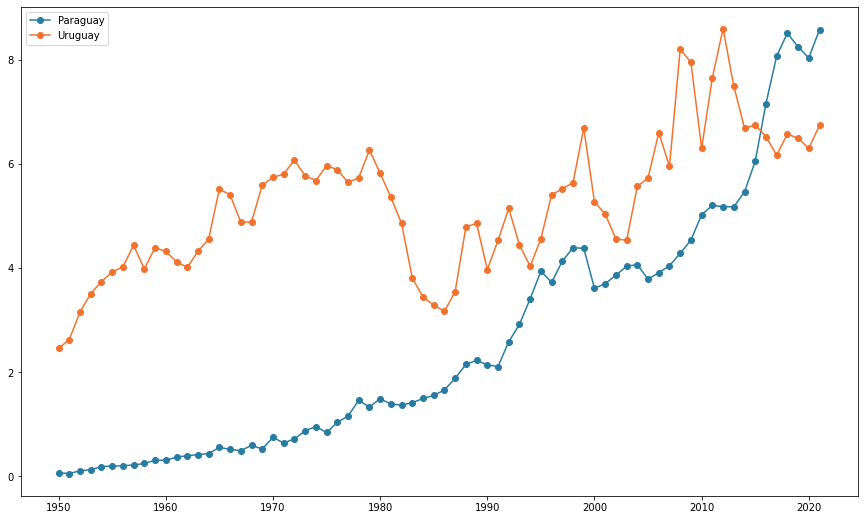

In [16]:
# Let's see the evolution of the CO2 for both countries.
fig = plt.figure(figsize=(15,9))
plt.plot(py_year_co2['year'], py_year_co2['co2'], '-o', color=color_palette[len(color_palette)-1])
plt.plot(uy_year_co2['year'], uy_year_co2['co2'], '-o', color=color_palette[len(color_palette)-9])
plt.legend(('Paraguay', 'Uruguay'))

It seems that **PY** had a gradual augmentation of the CO2 emissions (with two strong peaks : 90s and 2010s), whilst **UY** shows a more stable behaviour, even with some consistent decreases (80s, beginning of the 2000s, and 2010s), although it tends to increase in general. Currently we can see that **PY** produces much more CO2 than **UY**. However, a direct comparison could not be fair because there are some factors that must be considered (population size for instance). Therefore, we will do the same analysis but this time using the CO2 per capita.

### Analysing CO2 Emissions per Capita

In [17]:
# Get CO2 per capita per year.
py_year_co2 = df_Py[['year','co2_per_capita']]
uy_year_co2 = df_Uy[['year','co2_per_capita']]

In [18]:
# Get year of first reading.
py_year_of_first_reading = py_year_co2[pd.notna(py_year_co2['co2_per_capita'])]['year'].iloc[0]
uy_year_of_first_reading = uy_year_co2[pd.notna(uy_year_co2['co2_per_capita'])]['year'].iloc[0]
print("Year of first reading for PY : %d" % py_year_of_first_reading)
print("Year of first reading for UY : %d" % uy_year_of_first_reading)

Year of first reading for PY : 1950
Year of first reading for UY : 1932


Again, **UY** has much more readings (since $1932$). So let's grab only the data from $1950$ to the last year.

In [19]:
# Get index of first reading.
py_idx_of_first_reading = py_year_co2[pd.notna(py_year_co2['co2_per_capita'])]['year'].index[0]
uy_idx_of_first_reading = uy_year_co2[pd.notna(uy_year_co2['co2_per_capita'])]['year'].index[0]

# Split the dataset using the index of the first reading of the country with less readings.
py_year_co2 = py_year_co2.loc[py_idx_of_first_reading:]
uy_year_co2 = uy_year_co2.loc[py_idx_of_first_reading:]

In [20]:
# Check the size of both datasets.
print("PY Dataset Length : %d" % len(py_year_co2))
print("UY Dataset Length : %d" % len(uy_year_co2))

PY Dataset Length : 72
UY Dataset Length : 72


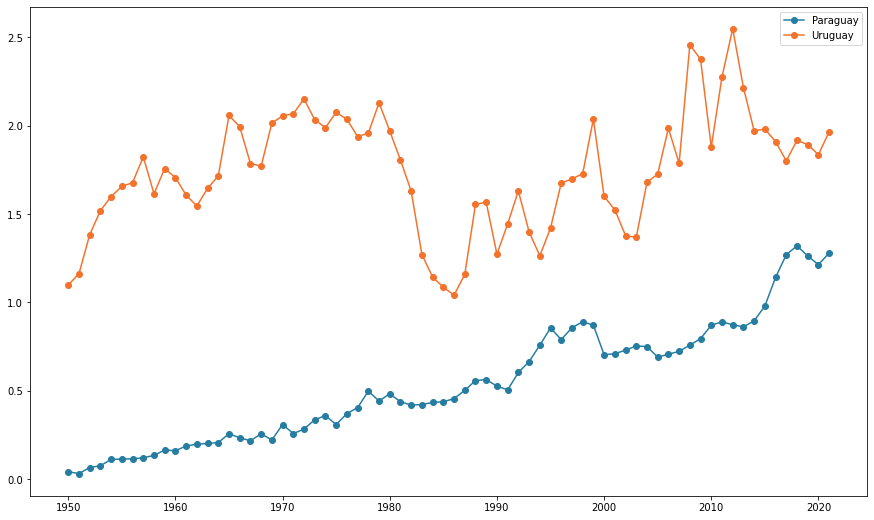

In [21]:
# Let's see the evolution of the CO2 per capita for both countries.
fig = plt.figure(figsize=(15,9))
plt.plot(py_year_co2['year'], py_year_co2['co2_per_capita'], '-o', color=color_palette[len(color_palette)-1])
plt.plot(uy_year_co2['year'], uy_year_co2['co2_per_capita'], '-o', color=color_palette[len(color_palette)-9])
plt.legend(('Paraguay', 'Uruguay'))
plt.show()

**UY** has a higher CO2 emission per capita, and it looks like there is a high variability of the emissions throughout the years, compared to the one from **PY**, which increased in a more stable manner. Let's check this through statistical metrics (rather than only visual representations).

In [22]:
# MEAN.
mean_py = py_year_co2['co2_per_capita'].mean()
mean_uy = uy_year_co2['co2_per_capita'].mean()
print("PY Dataset MEAN : %.5f" % mean_py)
print("UY Dataset MEAN : %.5f" % mean_uy)

# Standard Deviation.
std_py = py_year_co2['co2_per_capita'].std()
std_uy = uy_year_co2['co2_per_capita'].std()
print("PY Dataset STD : %.5f" % std_py)
print("UY Dataset STD : %.5f" % std_uy)

# Standard Deviation.
std_py = py_year_co2['co2_per_capita'].std()
std_uy = uy_year_co2['co2_per_capita'].std()
print("PY Dataset STD : %.5f" % std_py)
print("UY Dataset STD : %.5f" % std_uy)

PY Dataset MEAN : 0.53988
UY Dataset MEAN : 1.74233
PY Dataset STD : 0.34073
UY Dataset STD : 0.33239
PY Dataset STD : 0.34073
UY Dataset STD : 0.33239


It is interesting that the deviation for **PY** is higher than the one from **UY**, so there is more variability in the data from **PY**. Now let's see the variability of the data through a boxplot, which should also let us see if the data distribution is the same or not.

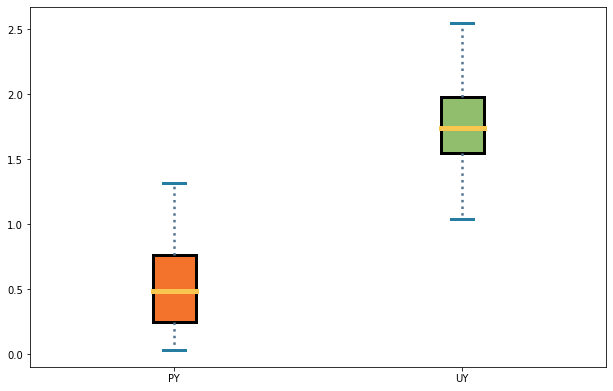

In [23]:
fig = plt.figure(figsize=(8,5))
ax  = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot([py_year_co2['co2_per_capita'], uy_year_co2['co2_per_capita']], 
                patch_artist = True,
                vert = 1)

# Boxes style.
for patch, color in zip(bp['boxes'], [color_palette[1], color_palette[5]]):
    patch.set_facecolor(color)
    patch.set(linewidth = 3)
    
# Whiskers style.
for whisker in bp['whiskers']:
    whisker.set(color = color_palette[8],
                linewidth = 2.5,
                linestyle =":")
    
# Caps style.
for cap in bp['caps']:
    cap.set(color = color_palette[9], linewidth = 3)

# Median style.
for median in bp['medians']:
    median.set(color = color_palette[4], linewidth = 5)

# Lables.
ax.set_xticklabels(['PY', 'UY'])

plt.show()

Let's see the histogram of both datasets for a final graphical comparison.

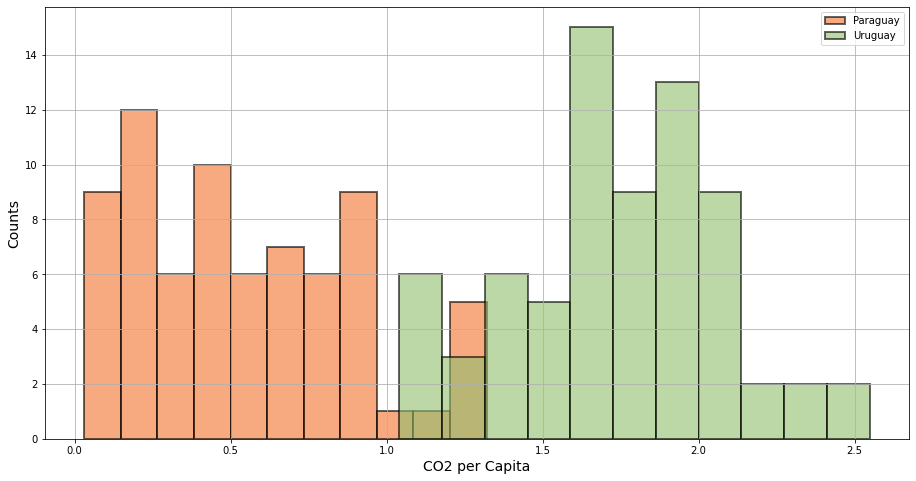

In [24]:
fig = plt.figure(figsize=(12,6))
ax  = fig.add_axes([0, 0, 1, 1])
bins = 11
ax.hist(py_year_co2['co2_per_capita'], bins, lw=2, facecolor=color_palette[1], alpha=0.6, edgecolor = 'black')
ax.hist(uy_year_co2['co2_per_capita'], bins, lw=2, facecolor=color_palette[5], alpha=0.6, edgecolor = 'black')
plt.ylabel('Counts', size=14)
plt.xlabel('CO2 per Capita', size=14)
plt.legend(('Paraguay', 'Uruguay'))
plt.grid(True)

We can also see the density plot to confirm that these are, indeed, very different data distributions. We could also do some statistical tests to validate that they are from different distributions but visually it is already very clear.

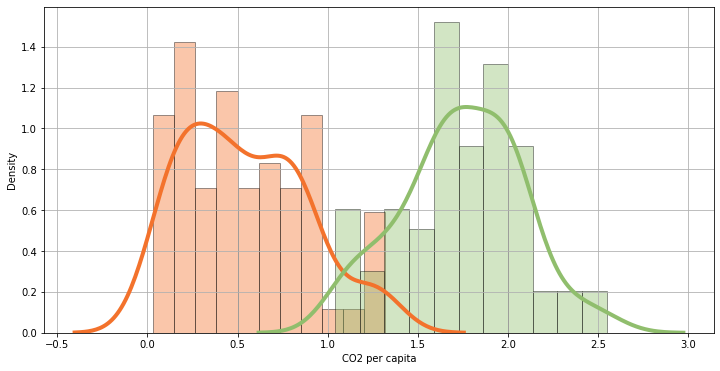

In [25]:
fig = plt.figure(figsize=(12,6))

ax = sns.distplot(py_year_co2['co2_per_capita'], bins, hist=True, kde=True,
             color = color_palette[1], 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

ax = sns.distplot(uy_year_co2['co2_per_capita'], bins, hist=True, kde=True,
             color = color_palette[5],  
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

ax.set(xlabel='CO2 per capita')

plt.grid(True)

### Predicting future CO2 Emissions from Paraguay

In [26]:
import numpy as np 
import statsmodels
import sklearn
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Now lets print the version of the libraries that we use in this notebook.
print('Statsmodels version:', statsmodels.__version__)
print('Scikit-learn version:', sklearn.__version__)

Statsmodels version: 0.13.1
Scikit-learn version: 1.0.2


In [27]:
# ------------ Dataset pre-processing and visualization ------------ # 
# Split the dataset into train and test sets, we use the last num_test data points for testing.
num_test = 20 # Here we define how many of the last data points we will use as dataset for testing the model.
X_train = np.asarray(py_year_co2['co2_per_capita'][:-num_test])
X_test = np.asarray(py_year_co2['co2_per_capita'][-num_test:])

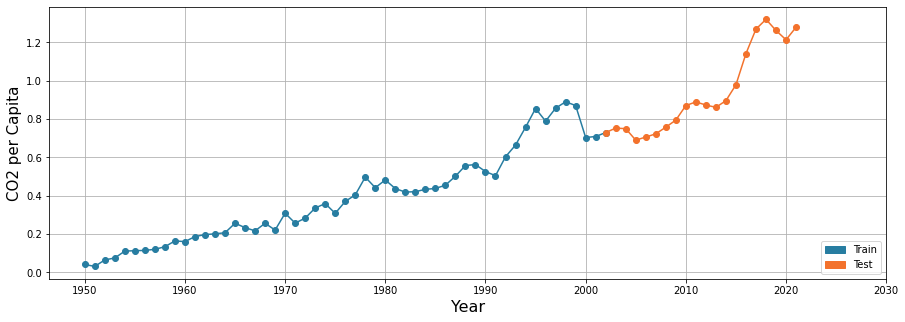

In [28]:
# Show the dataset distribution (train vs test), note that we still use the original 
# dataframe to plot (for simplicity)
plt.figure(figsize=(15, 5))
plt.plot(py_year_co2['year'][:-(num_test-1)], 
         py_year_co2['co2_per_capita'][:-(num_test-1)], 
         'o-', color=color_palette[len(color_palette)-1])
plt.plot(py_year_co2['year'][-num_test:], 
         py_year_co2['co2_per_capita'][-num_test:], 
         'o-', color=color_palette[len(color_palette)-9])
plt.xlabel('Year', size=16)
plt.ylabel('CO2 per Capita', size=15)
plt.xticks(np.arange(min(py_year_co2['year']), max(py_year_co2['year'])+10, 10))
plt.grid(which='both')
train_patch = mpatches.Patch(color=color_palette[len(color_palette)-1], label='Train')
test_pach = mpatches.Patch(color=color_palette[len(color_palette)-9], label='Test')
plt.legend(handles=[train_patch, test_pach], loc='lower right')
plt.show()

In [29]:
# ------------ ARIMA model ------------ # 
# Train and test the predictive model
# The metric used to test the model is the Mean Squared Error (MSE)
h = [x for x in X_train]
predictions = list()
for t in range(len(X_test)):
    model = ARIMA(h, order=(2,1,0)).fit()
    y = model.forecast()[0]
    predictions.append(y)
    h.append(X_test[t])
error = mean_squared_error(X_test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 0.004


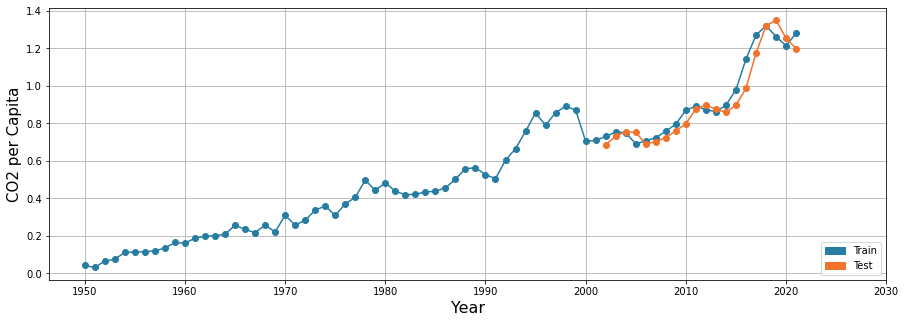

In [30]:
# Visualize the predictions.
plt.figure(figsize=(15, 5))
plt.plot(py_year_co2['year'], py_year_co2['co2_per_capita'], 'o-', color=color_palette[len(color_palette)-1])
plt.plot(py_year_co2['year'][-num_test:], predictions, 'o-', color=color_palette[len(color_palette)-9])
plt.xlabel('Year', size=16)
plt.ylabel('CO2 per Capita', size=15)
plt.xticks(np.arange(min(py_year_co2['year']), max(py_year_co2['year'])+10, 10))
plt.grid(which='both')
train_patch = mpatches.Patch(color=color_palette[len(color_palette)-1], label='Train')
test_pach = mpatches.Patch(color=color_palette[len(color_palette)-9], label='Test')
plt.legend(handles=[train_patch, test_pach], loc='lower right')
plt.show()

We can see a very good prediction capability using [ARIMA](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average). Now let's try with new data points.

In [31]:
# ------------ ARIMA model ------------ # 
# Train and test the predictive model
# The metric used to test the model is the Mean Squared Error (MSE)
new_predictions = 10 # Let's predict for the next 10 years.
X = py_year_co2['co2_per_capita'].values.tolist()
Y = list() # We will also create the datapoints for the YEAR variable.
next_year   = py_year_co2['year'].iloc[-1]
predictions = list()
for t in range(new_predictions):
    next_year += 1
    model = ARIMA(X, order=(2,1,0)).fit(method_kwargs={"warn_convergence": False})
    y = model.forecast()[0]
    X.append(y)
    predictions.append(y)
    Y.append(next_year)

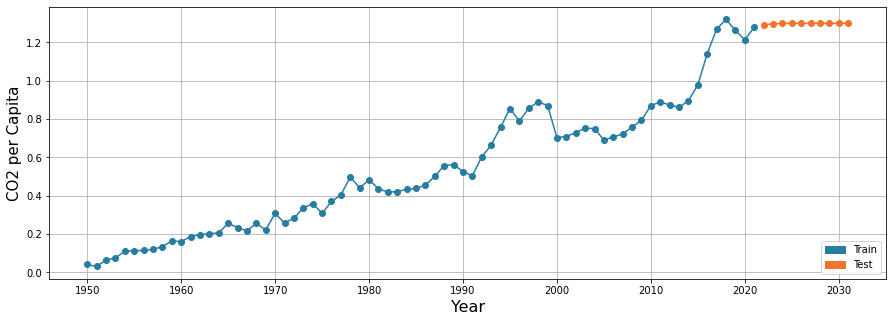

In [32]:
# Visualize the predictions.
plt.figure(figsize=(15, 5))
plt.plot(py_year_co2['year'], py_year_co2['co2_per_capita'], 'o-', color=color_palette[len(color_palette)-1])
plt.plot(Y, predictions, 'o-', color=color_palette[len(color_palette)-9])
plt.xlabel('Year', size=16)
plt.ylabel('CO2 per Capita', size=15)
plt.xticks(np.arange(min(py_year_co2['year']), max(py_year_co2['year'])+10, 10))
plt.grid(which='both')
train_patch = mpatches.Patch(color=color_palette[len(color_palette)-1], label='Train')
test_pach = mpatches.Patch(color=color_palette[len(color_palette)-9], label='Test')
plt.legend(handles=[train_patch, test_pach], loc='lower right')
plt.show()

ARIMA can predict the next datapoint correctly, but it is not capable of going further. We will try SARIMAX now.

In [35]:
warnings.filterwarnings('ignore')

In [36]:
# ------------ SARIMAX model ------------ # 
# Train and test the predictive model
# The metric used to test the model is the Mean Squared Error (MSE)
new_predictions = 20 # Let's predict for the next 20 years.
Y = list()
for i in range(new_predictions):
    if i == 0:
        Y.append(py_year_co2['year'].iloc[-1]+1)
    else:
        Y.append(Y[i-1]+1)

# Train the model.
from statsmodels.tsa.statespace.sarimax import SARIMAX
model  = SARIMAX(py_year_co2['co2_per_capita'], 
                 order=(2,1,2), 
                 seasonal_order=(2,1,2,6)).fit(disp=0)

# Predict.
start = len(py_year_co2)
end   = len(py_year_co2) + new_predictions - 1
predictions = model.predict(start=start, end=end).values.tolist()

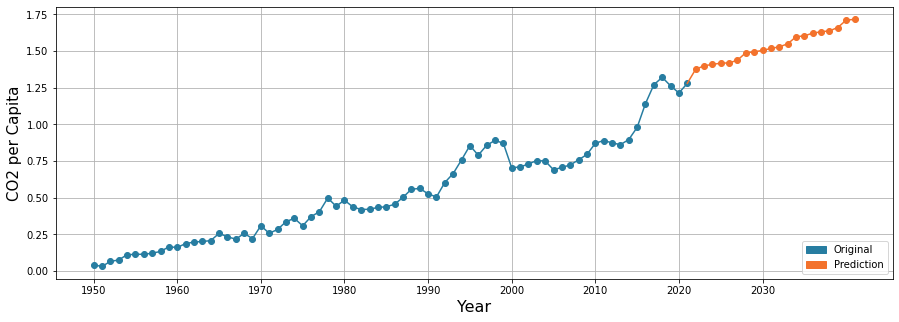

In [37]:
# Visualize the predictions.
plt.figure(figsize=(15, 5))
plt.plot(py_year_co2['year'], py_year_co2['co2_per_capita'], 'o-', color=color_palette[len(color_palette)-1])
plt.plot([py_year_co2['year'].iloc[-1],Y[0]], [py_year_co2['co2_per_capita'].iloc[-1], predictions[0]], 
     '-', color=color_palette[len(color_palette)-9])
plt.plot(Y, predictions, 'o-', color=color_palette[len(color_palette)-9])
plt.xlabel('Year', size=16)
plt.ylabel('CO2 per Capita', size=15)
plt.xticks(np.arange(min(py_year_co2['year']), max(py_year_co2['year'])+10, 10))
plt.grid(which='both')
original_patch = mpatches.Patch(color=color_palette[len(color_palette)-1], label='Original')
prediction_pach = mpatches.Patch(color=color_palette[len(color_palette)-9], label='Prediction')
plt.legend(handles=[original_patch, prediction_pach], loc='lower right')
plt.show()

It looks like CO2 emissions per capita will only grow in the future 😔

### Variables correlation
Let's check out the correlation between the different variables of the dataset, we will check for both countries. We will pick some specific variables that we consider they could have some degree of correlation, we will only consider the 'per capita' values.

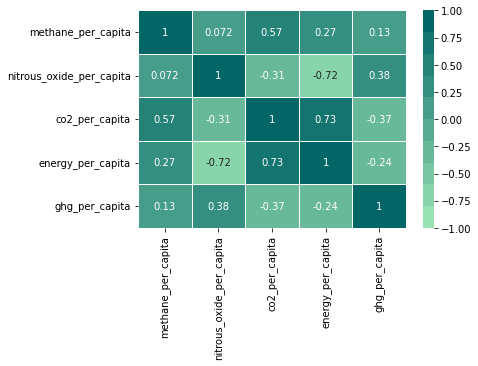

In [38]:
# For PY.
percap_vals_py = df_Py[['methane_per_capita','nitrous_oxide_per_capita', 'co2_per_capita', 'energy_per_capita', 'ghg_per_capita']]
ax = sns.heatmap(percap_vals_py.corr(), vmin=-1, vmax=1, cmap=gradual_color_palette, annot=True, linewidth=.5)
plt.show()

For **PY**, we can see some interesting things like the CO2 per capita is strongly correlated to the enery per capita, which makes sense, and to the methane per capita to some extent. It is also interesting to see that the GHG per capita can be considered as not correlated to the CO2 per capita.

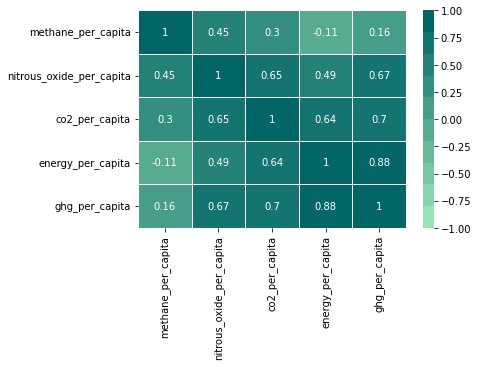

In [39]:
# For UY.
percap_vals_uy = df_Uy[['methane_per_capita','nitrous_oxide_per_capita', 'co2_per_capita', 'energy_per_capita', 'ghg_per_capita']]
ax = sns.heatmap(percap_vals_uy.corr(), vmin=-1, vmax=1, cmap=gradual_color_palette, annot=True, linewidth=.5)
plt.show()

For **UY** there is more correlation between the CO2 and the other variables. We can see a strong correlation between the CO2 per capita and the GHG per capita, and moderated correlation with the nitrous oxide and the energy per capita. It is interesting to see an almost non-existant (or very low) correlation between the methane per capita and the rest of the variables, including the CO2 per capita.